In [157]:
from manim import *
import numpy as np

config.media_width = "75%"
config.media_embed = True

PC_BOT = lambda: Text("⯋").scale(1.25)
PC_TOP = lambda: Text("⯊").scale(1.25)
PC_RIGHT = lambda: Text("◗").scale(1.25)
PC_LEFT = lambda: Text("◖").scale(1.25)
PC_CEN = lambda: Text("●").scale(1.25)
PC_MID = lambda: Text("■").scale(1.25)
#PC_UNK = Text("")
PC_UNK = lambda: Text("⬚").scale(1.25)
#PC_WAT = 
PC_WAT = lambda: Text("≋").scale(1.25)

In [158]:
#%%manim -v WARNING -qm BannerExample

class BannerExample(Scene):
    def construct(self):
        self.camera.background_color = "#ece6e2"
        banner_large = ManimBanner(dark_theme=False).scale(0.7)
        self.play(banner_large.create())
        self.play(banner_large.expand())

In [159]:

m_pdf = np.empty((10, 10), dtype=object)
for i in range(10):
    for j in range(10):
        m_pdf[i, j] = PC_UNK()


#print(m_pdf)


In [160]:
board_m = MobjectMatrix(m_pdf, left_bracket="[", right_bracket="]").scale(0.75)

#no_cols_np = np.array([2,3,2,2,3,0,1,3,2,2])
#no_cols_np.transpose()

no_cols = [[2], [3], [2], [2], [3], [0], [1], [3], [2], [2]]

#no_cols_np = [[2,3,2,2,3,0,1,3,2,2]]
no_rows_np = np.array([6,0,1,0,2,1,3,1,2,4])

no_cols = Matrix(no_cols, left_bracket="|", right_bracket="|").scale(0.75)
no_rows = Matrix([no_rows_np], left_bracket="|", right_bracket="|").scale(0.75)


In [161]:
%%manim -v WARNING -qm BimaruMatrix


class BimaruMatrix(Scene):
    def construct(self):
        #board_m = Matrix(m_pdf, left_bracket="[", right_bracket="]").scale(0.75)
        #self.add(board_m)
        self.play(Write(board_m), run_time=2)
        self.wait()

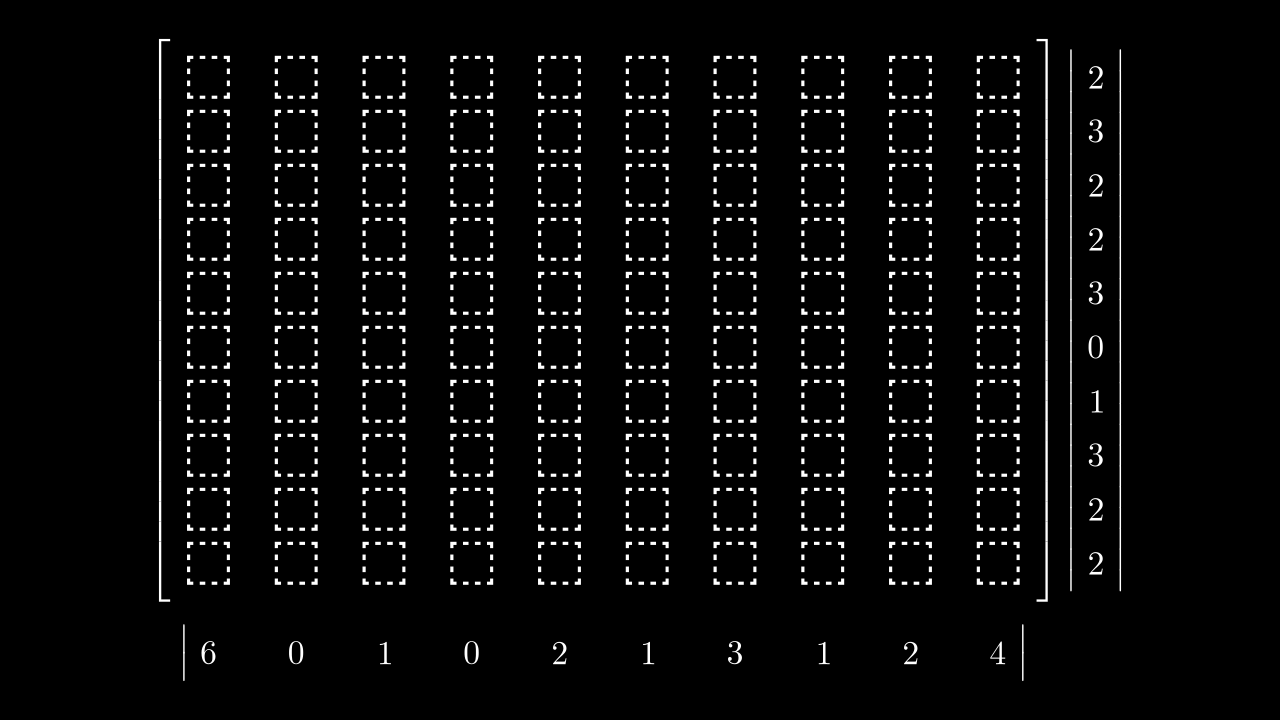

In [162]:
%%manim -v WARNING -qm BimaruBoard

class BimaruBoard(Scene):
    global board_m, no_cols, no_rows
    def construct(self):
        global board
        board = Group(board_m, no_cols, no_rows) \
                .arrange_in_grid()
        self.add(board)

In [163]:
%%manim -v WARNING -qm BimaruInitialHints

#board_hints = board.copy()

m_pdf[0, 0] = PC_TOP()
m_pdf[1, 6] = PC_MID()
m_pdf[3, 2] = PC_CEN()
m_pdf[6, 0] = PC_WAT()
m_pdf[8, 8] = PC_BOT()
m_pdf[9, 5] = PC_CEN()

m_hints = MobjectMatrix(m_pdf, left_bracket="[", right_bracket="]").scale(0.75)


class BimaruInitialHints(Scene):
    def construct(self):
        global board, board_hints
        board_hints = Group(m_hints, no_cols, no_rows) \
                .arrange_in_grid()

        self.add(board)
        self.play(Transform(board, board_hints))
        #board_hints = board.copy()
        
        